<a href="https://colab.research.google.com/github/lotaa/sparks_foundation_internship_Task-1/blob/main/Prediction_Using_Supervised_ML_(Level_Begginer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Implement regression functions.**
We will see implementation of simple Linear Regression With Scikit-Learn library for machine learning
This is a simple linear regression task as it involves just two variables.


---

##the goal of notebook:
Predict the percentage of an student based on the no of study hours


In [43]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_percentage_error
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Shape of data
data.shape

(25, 2)

# EAD


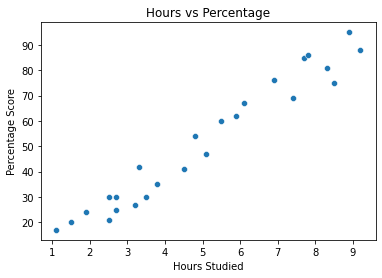

In [5]:
# Plotting the scatter plot between hours and scores
sns.scatterplot(x='Hours', y='Scores', data=data)  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph, we can clearly see that there is a positive correlation between no. of hours studied and percentage of score.**

In [6]:
np.corrcoef(data['Hours'], data['Scores'])

array([[1.        , 0.97619066],
       [0.97619066, 1.        ]])

**This To insure positive relation between Two varaibles**

**Check if there existing Missing values**

In [10]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

**1- Preparing the data**

In [26]:
X = data[['Hours']]
y = data[['Scores']]

Now that we have our Feature and target, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=42) 

### **2- Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [21]:
regressor = LinearRegression()
regressor.fit(X_train, y_train) 


LinearRegression()

Text(0.5, 1.0, 'Fitting line of model')

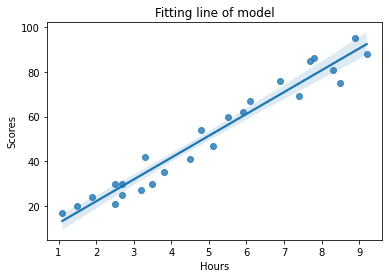

In [22]:
# plot Model 
sns.regplot(x='Hours', y='Scores', data=data)
plt.title('Fitting line of model')

**3- Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions

In [28]:
y_predict = regressor.predict(X_test)

In [24]:
# compare Actual and predict values
df = pd.DataFrame({'Actually': y_test, "predicted":y_predict})
df.head()

,Actually,predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


In [41]:
# You can also test with your own data
hours = np.array(9.25).reshape(-1, 1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.38611528261494


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


**4- Evaluating the model**

In [44]:
print('Mean Absolute Percentage Error:', 
     mean_absolute_percentage_error(y_test, y_predict))

Mean Absolute Percentage Error: 0.10600118977553538
